In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme()

In [4]:
import re
def get_re_group(r, txt):
    match = re.search(r, txt)

    if match:
        return float(match.groups()[0])
    else:
        return np.nan

In [5]:
train_df = pd.read_csv("train.csv", index_col="id")
test_df = pd.read_csv("test.csv", index_col="id")

## 1. Data Insight

In [6]:
train_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.7+ MB


### Giải thích ý nghĩa các trường:
1. `brand` & `model`: Identify the brand or company name along with the specific model of each vehicle.
2. `model_year`: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
3. `mileage`: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
4. `fuel_type`: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
5. `engine`: Understand the engine specifications, shedding light on performance and efficiency.
6. `transmission`: Car’s gearbox.
7. `ext_col` & `int_col`: Explore the aesthetic aspects of the vehicles, including exterior and interior color options.
8. `accident`: Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
9. `clean_title`:  It indicates that the car has not had any major incidents that would significantly impact its structural or operational integrity.
10. `price`: Access the listed prices for each vehicle, aiding in price comparison and budgeting.

In [8]:
numerical_features = train_df.select_dtypes(np.number).columns.values

print("Numerical Feature: ", numerical_features)
train_df[numerical_features].describe().T

Numerical Feature:  ['model_year' 'milage' 'price']


,count,mean,std,min,25%,50%,75%,max
model_year,188533.0,2015.829998,5.660967,1974.0,2013.0,2017.0,2020.0,2024.0
milage,188533.0,65705.295174,49798.158076,100.0,24115.0,57785.0,95400.0,405000.0
price,188533.0,43878.016178,78819.522254,2000.0,17000.0,30825.0,49900.0,2954083.0


In [9]:
categorical_feature = train_df.select_dtypes(exclude=np.number).columns.values

print("Categorical Feature: ", categorical_feature)
train_df[categorical_feature].describe().T

Categorical Feature:  ['brand' 'model' 'fuel_type' 'engine' 'transmission' 'ext_col' 'int_col'
 'accident' 'clean_title']


,count,unique,top,freq
brand,188533,57,Ford,23088
model,188533,1897,F-150 XLT,2945
fuel_type,183450,7,Gasoline,165940
engine,188533,1117,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3462
transmission,188533,52,A/T,49904
ext_col,188533,319,Black,48658
int_col,188533,156,Black,107674
accident,186081,2,None reported,144514
clean_title,167114,1,Yes,167114


## 2. Data Engineering
### 2.1. `engine`

In [10]:
train_df["engine"].value_counts()

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel           3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel           2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel           2841
2.0L I4 16V GDI DOHC Turbo                             2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel          2451
                                                       ... 
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel               1
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas       1
151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid        1
184.0HP 2.4L 4 Cylinder Engine Flex Fuel Capability       1
313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas       1
Name: count, Length: 1117, dtype: int64

Ý tưởng: Chia `engine` ra thành `horse_power`, `engine_size`, `cylinder`

In [11]:
train_df['horse_power'] = train_df['engine'].apply(lambda en: get_re_group(r'(\d+\.\d+)HP', en))
train_df['engine_size'] = train_df['engine'].apply(lambda en: get_re_group(r'(\d+\.\d+)L', en))
train_df['cylinder'] = train_df['engine'].apply(lambda en: get_re_group(r'(\d+) Cylinder', en))

In [12]:
train_df[['horse_power', 'engine_size', 'cylinder']]

,horse_power,engine_size,cylinder
id,,,
0,172.0,1.6,4.0
1,252.0,3.9,8.0
2,320.0,5.3,8.0
3,420.0,5.0,8.0
4,208.0,2.0,4.0
...,...,...,...
188528,420.0,6.2,8.0
188529,385.0,3.0,6.0
188530,469.0,4.0,8.0


### 2.2. `fuel_type`

In [219]:
train_df['fuel_type'].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

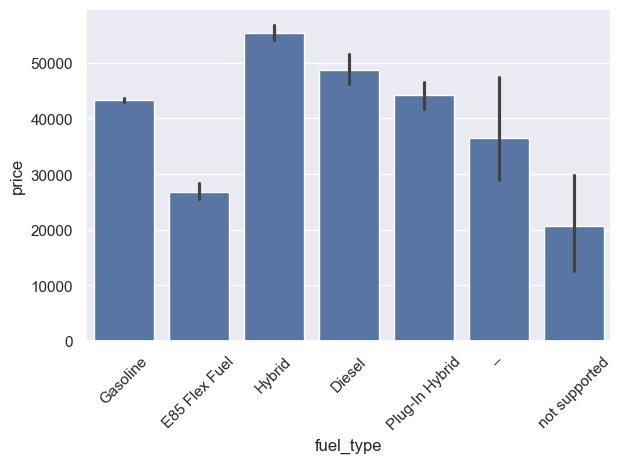

In [14]:
sns.barplot(data=train_df, x='fuel_type', y='price', estimator=np.mean);
plt.xticks(rotation=45)  # Adjust the degree of rotation as needed
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

In [221]:
def determine_fuel_type(engine):
    if pd.isna(engine):
        return None
    if re.search(r'Electric|Battery|kW|charge|kw', engine, re.IGNORECASE):
        return 'Electric'
    if re.search(r'Diesel', engine, re.IGNORECASE):
        return 'Diesel'
    if re.search(r'Flex Fuel|E85', engine, re.IGNORECASE):
        return 'E85 Flex Fuel'
    if re.search(r'Gasoline|Standard|Turbo|Liter|GDI|MPFI|PDI', engine, re.IGNORECASE):
        return 'Gasoline'
    return None

def handle_some_missing_fuel_type(data):
    mask = ((data['fuel_type'] != 'Diesel') & (data['fuel_type'] != 'Electric') & (data['fuel_type'] != 'E85 Flex Fuel') & 
            (data['fuel_type'] != 'Gasoline') & (data['fuel_type'] != 'Hybrid') & (data['fuel_type'] != 'Plug-In Hybrid'))
    data.loc[mask, 'fuel_type'] = data.loc[mask, 'engine'].apply(determine_fuel_type)
    return data

In [222]:
train_df = handle_some_missing_fuel_type(train_df)
train_df['fuel_type'].value_counts()

fuel_type
Gasoline          166136
Hybrid              6832
E85 Flex Fuel       5408
Electric            4905
Diesel              3957
Plug-In Hybrid       521
Name: count, dtype: int64

In [ ]:
sns.barplot(data=train_df, x='fuel_type', y='price', estimator=np.mean);
plt.xticks(rotation=45)  # Adjust the degree of rotation as needed
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

### 2.3. `transmission`

In [223]:
train_df['transmission'].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

Ý tưởng: Chia `transmission` ra thành `transmission_speed` và `transmission_type`.<br>
Trong đó, `transmission_type` gồm các giá trị:
- `A/T` (Automatic Transmission)
- `M/T` (Manual Transmission)
- `CVT` (Continuously Variable Transmission)
- `DCT` (Dual-Clutch Transmission)
- `Fixed Gear` (Single-Speed Fixed Gear)
- `Electronically Controlled` (Electronically Controlled Automatic)
- `Auto-Shift` (Automatic with Auto-Shift)
- `Overdrive` (Transmission with Overdrive Switch)

In [224]:
train_df['transmission_speed'] = train_df['transmission'].apply(lambda trans: get_re_group(r'(\d+)', trans))

In [225]:
train_df['transmission_speed'].value_counts()

transmission_speed
6.0     33278
8.0     29673
7.0     13027
10.0    11248
9.0      6224
5.0      5785
4.0      2594
1.0      2234
2.0       184
Name: count, dtype: int64

In [226]:
train_df['transmission_type'] = np.nan
train_df['transmission_type'] = train_df['transmission_type'].astype('object')
train_df.loc[train_df['transmission'].str.contains(r'Manual|MT|M/T', na=False, case=False), 'transmission_type'] = 'M/T'
train_df.loc[train_df['transmission'].str.contains(r'A/T|Automatic|AT', na=False, case=False), 'transmission_type'] = 'A/T'
train_df.loc[train_df['transmission'].str.contains(r'CVT|Variable', na=False, case=False), 'transmission_type'] = 'CVT'
train_df.loc[train_df['transmission'].str.contains(r'DCT|Dual Shift Mode', na=False, case=False), 'transmission_type'] = 'DCT'
train_df.loc[train_df['transmission'].str.contains(r'Fixed Gear', na=False, case=False), 'transmission_type'] = 'Fixed Gear'
train_df.loc[train_df['transmission'].str.contains(r'Electronically Controlled Automatic', na=False, case=False), 'transmission_type'] = 'Electronically Controlled'
train_df.loc[train_df['transmission'].str.contains(r'Auto-Shift|AT/MT', na=False, case=False), 'transmission_type'] = 'Auto-Shift'
train_df.loc[train_df['transmission'].str.contains(r'Overdrive', na=False, case=False), 'transmission_type'] = 'Overdrive'

In [227]:
train_df['transmission_type'].value_counts()

transmission_type
A/T                          147532
DCT                           19273
M/T                           16395
CVT                            2900
Auto-Shift                     1885
Overdrive                       196
Electronically Controlled        31
Fixed Gear                       16
Name: count, dtype: int64

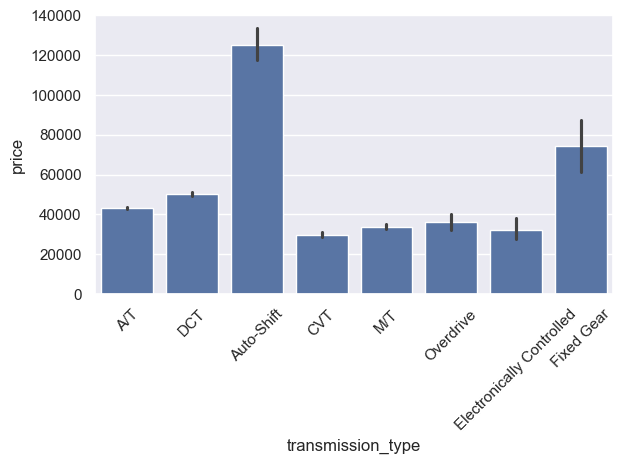

In [228]:
sns.barplot(data=train_df, x='transmission_type', y='price', estimator=np.mean)
plt.xticks(rotation=45)  # Adjust the degree of rotation as needed
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

### 2.4. `model_year` & `mileage`
Chuyển `model_year` và `milage` thành `car_age` và `yearly_mileage`

In [9]:
import datetime
train_df['car_age'] = datetime.datetime.now().year - train_df['model_year']
train_df.loc[train_df['car_age'] == 0, 'car_age'] = 1
train_df['yearly_mileage'] = train_df['milage'] / train_df['car_age']

### 2.5. `model`
Chuyển `model` thành `model_class` bao gồm các giá trị:
- `Base`
- `Mid-Range`
- `Performance/Sport`
- `Luxury`

In [230]:
train_df['model'].value_counts()

model
F-150 XLT                        2945
M3 Base                          2229
Camaro 2SS                       1709
M4 Base                          1622
Mustang GT Premium               1526
                                 ... 
ForTwo Pure                         2
XLR Base                            1
X5 3.0i                             1
X5 xDrive40e                        1
Integra w/A-Spec Tech Package       1
Name: count, Length: 1897, dtype: int64

In [231]:
train_df['model_class'] = np.nan
train_df['model_class'] = train_df['model_class'].astype('object')
train_df.loc[train_df['model'].str.contains('S|L|Base', na=False, case=False), 'model_class'] = 'Base'
train_df.loc[train_df['model'].str.contains('SE|SX|SRT|GT', na=False, case=False), 'model_class'] = 'Mid-Range'
train_df.loc[train_df['model'].str.contains('EX|SXT', na=False, case=False), 'model_class'] = 'Performance/Sport'
train_df.loc[train_df['model'].str.contains('EX-L|LX|LE|SEL|Platinum|Premium|Limited', na=False, case=False), 'model_class'] = 'Luxury'

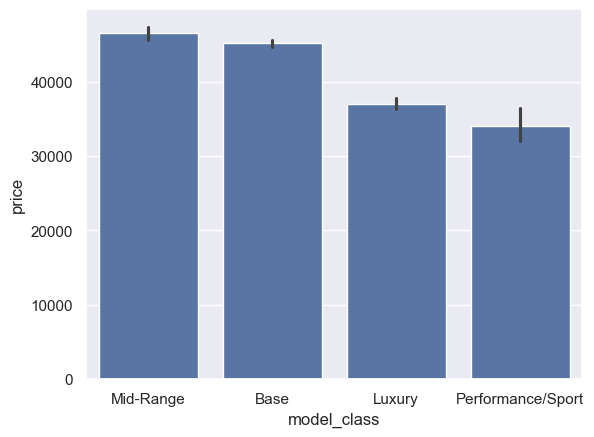

In [232]:
sns.barplot(data=train_df, x='model_class', y='price', estimator=np.mean);

`Luxury` rẻ hơn `Base`?
### 2.6 `brand`
Chia các `brand` thành các loại:
- `Luxury`
- `Premium`
- `Mainstream`
- `Economy`
- `Supercar`

In [10]:
luxury_brands = 'Mercedes-Benz|BMW|Audi|Porsche|Lexus|Cadillac|Jaguar|Bentley|Maserati|Lamborghini|Rolls-Royce|Ferrari|McLaren|Aston|Martin|Lucid|Lotus|Karma|Bugatti|Maybach'
premium_brands = 'Acura|Infiniti|Genesis|Volvo|Lincoln|Land|Rover'
mainstream_brands = 'Ford|Chevrolet|Toyota|Jeep|RAM|Nissan|Tesla|GMC|Dodge|Mazda|Kia|Subaru|Honda|Hyundai|Volkswagen|Buick|Chrysler|Mitsubishi|Polestar|Rivian'
economy_brands = 'MINI|Fiat|Saab|Suzuki|smart'
supercar_brands = 'Lamborghini|Ferrari|McLaren|Bugatti'

train_df['brand_cat'] = np.nan
train_df['brand_cat'] = train_df['brand_cat'].astype('object')
train_df.loc[train_df['brand'].str.contains(luxury_brands, na=False, case=False), 'brand_cat'] = 'Luxury'
train_df.loc[train_df['brand'].str.contains(premium_brands, na=False, case=False), 'brand_cat'] = 'Premium'
train_df.loc[train_df['brand'].str.contains(mainstream_brands, na=False, case=False), 'brand_cat'] = 'Mainstream'
train_df.loc[train_df['brand'].str.contains(economy_brands, na=False, case=False), 'brand_cat'] = 'Economy'
train_df.loc[train_df['brand'].str.contains(supercar_brands, na=False, case=False), 'brand_cat'] = 'Supercars'

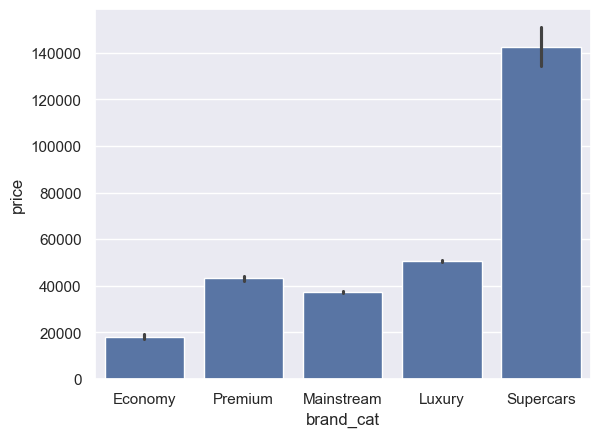

In [234]:
sns.barplot(data=train_df, x='brand_cat', y='price', estimator=np.mean);

### 2.7. `int_col` & `ext_col`

In [235]:
train_df.sort_values(by=['price'], ascending=False).head(20)[['int_col', 'ext_col', 'price']]

,int_col,ext_col,price
id,,,
14693,Black,Black,2954083
1880,Beige,Beige,2954083
65043,Black,Gray,2954083
103061,Diesel Gray / Black,Diamond Black,2954083
59650,Black,Ruby Flare Pearl,2954083
72448,Black,Red,2954083
103189,Gray,Red,2954083
80269,Black,Red,2954083
119162,Black,Oxford White,2954083


Phần này khó phân loại vì màu được đặt cho rất nhiều tên
- Ý tưởng 1: Phân loại theo màu cơ bản
- Ý tưởng 2: Phân ra thành `neutral` và `brighter`

In [236]:
train_df['ext_col_cat'] = 'Other'
train_df.loc[train_df['ext_col'].str.contains('Black|Midnight|Onyx|Graphite|Dark|Gray', na=False, case=False), 'ext_col_cat'] = 'Black/Gray'
train_df.loc[train_df['ext_col'].str.contains('White|Pearl|Silver|Platinum|Metallic', na=False, case=False), 'ext_col_cat'] = 'White/Silver'
train_df.loc[train_df['ext_col'].str.contains('Red|Ruby|Burgundy', na=False, case=False), 'ext_col_cat'] = 'Red/Maroon'
train_df.loc[train_df['ext_col'].str.contains('Blue|Navy|Sky', na=False, case=False), 'ext_col_cat'] = 'Blue'
train_df.loc[train_df['ext_col'].str.contains('Green|Forest', na=False, case=False), 'ext_col_cat'] = 'Green'
train_df.loc[train_df['ext_col'].str.contains('Yellow|Gold|Mustard', na=False, case=False), 'ext_col_cat'] = 'Yellow/Gold'
train_df.loc[train_df['ext_col'].str.contains('Brown|Bronze|Tan|Beige', na=False, case=False), 'ext_col_cat'] = 'Brown/Beige'
train_df.loc[train_df['ext_col'].str.contains('Orange|opper', na=False, case=False), 'ext_col_cat'] = 'Orange'
train_df.loc[train_df['ext_col'].str.contains('Purple|Lavender', na=False, case=False), 'ext_col_cat'] = 'Purple'

train_df['int_col_cat'] = 'Other'
train_df.loc[train_df['int_col'].str.contains('Black|Charcoal|Dark|Gray', na=False, case=False), 'int_col_cat'] = 'Black/Gray'
train_df.loc[train_df['int_col'].str.contains('White|Ivory|Beige', na=False, case=False), 'int_col_cat'] = 'White/Beige'
train_df.loc[train_df['int_col'].str.contains('Red|Burgundy', na=False, case=False), 'int_col_cat'] = 'Red/Maroon'
train_df.loc[train_df['int_col'].str.contains('Blue|Navy', na=False, case=False), 'int_col_cat'] = 'Blue'
train_df.loc[train_df['int_col'].str.contains('Brown|Tan', na=False, case=False), 'int_col_cat'] = 'Brown'

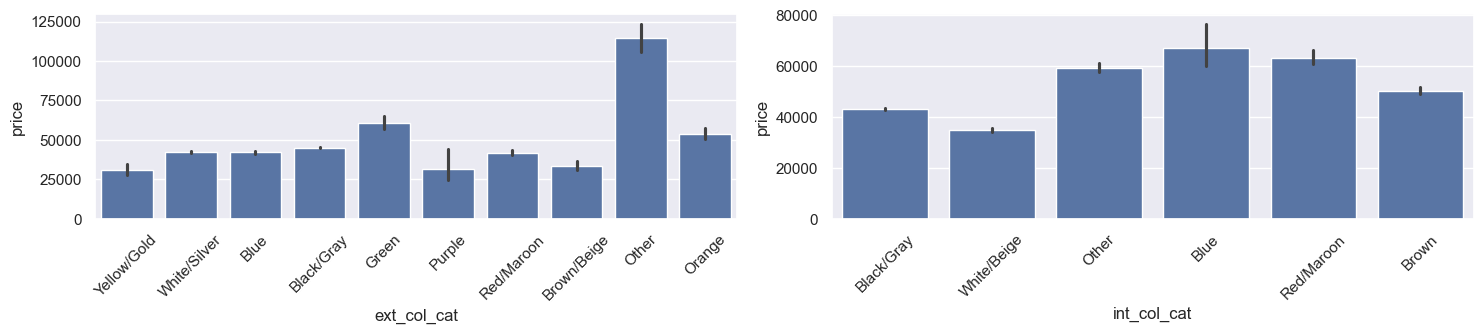

In [237]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3.5))

# First subplot
sns.barplot(data=train_df, x='ext_col_cat', y='price', estimator=np.mean, ax=ax[0])
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for the first subplot

# Second subplot
sns.barplot(data=train_df, x='int_col_cat', y='price', estimator=np.mean, ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for the second subplot

plt.tight_layout()  # Adjust the layout to avoid overlapping
plt.show()

### 2.8. `accident` & `clean_title`

In [238]:
train_df['accident'].value_counts()

accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64

In [239]:
train_df['clean_title'].value_counts()

clean_title
Yes    167114
Name: count, dtype: int64

Bỏ `clean_title` vì giá trị của nó không mang nhiều ý nghĩa

In [240]:
damage_reported = train_df['accident'] == 'At least 1 accident or damage reported'
train_df.loc[damage_reported, 'accident'] = 1
train_df.loc[~damage_reported, 'accident'] = 0

<Axes: xlabel='accident', ylabel='price'>

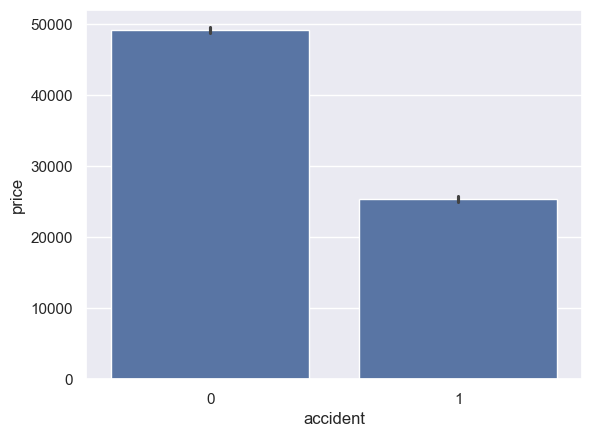

In [241]:
sns.barplot(data=train_df, x='accident', y='price', estimator=np.mean)

In [242]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brand               188533 non-null  object 
 1   model               188533 non-null  object 
 2   model_year          188533 non-null  int64  
 3   milage              188533 non-null  int64  
 4   fuel_type           187759 non-null  object 
 5   engine              188533 non-null  object 
 6   transmission        188533 non-null  object 
 7   ext_col             188533 non-null  object 
 8   int_col             188533 non-null  object 
 9   accident            188533 non-null  object 
 10  clean_title         167114 non-null  object 
 11  price               188533 non-null  int64  
 12  horse_power         155274 non-null  float64
 13  engine_size         174319 non-null  float64
 14  cylinder            150678 non-null  float64
 15  transmission_speed  104247 non-null  fl

In [243]:
train_df = train_df.drop(['brand','model', 'model_year', 'engine', 'transmission', 'ext_col', 'int_col', 'clean_title'], axis=1)

## 3. Fill missing data

In [244]:
for col in train_df.columns:
    missing_data = train_df[col].isna().sum()
    missing_ratio = missing_data / len(train_df) *100

    print(f"Column {col} has: {missing_ratio:.2f}% missing data")

Column milage has: 0.00% missing data
Column fuel_type has: 0.41% missing data
Column accident has: 0.00% missing data
Column price has: 0.00% missing data
Column horse_power has: 17.64% missing data
Column engine_size has: 7.54% missing data
Column cylinder has: 20.08% missing data
Column transmission_speed has: 44.71% missing data
Column transmission_type has: 0.16% missing data
Column car_age has: 0.00% missing data
Column yearly_mileage has: 0.00% missing data
Column model_class has: 11.94% missing data
Column brand_cat has: 1.10% missing data
Column ext_col_cat has: 0.00% missing data
Column int_col_cat has: 0.00% missing data


In [245]:
for col in ['horse_power', 'engine_size']:
    mean = train_df[col].mean()
    train_df.loc[train_df[col].isna(), col] = mean

for col in ['cylinder', 'model_class', 'transmission_type', 'fuel_type', 'brand_cat']:
    mode = train_df[col].mode().iloc[0]
    train_df.loc[train_df[col].isna(), col] = mode

Do `transmission_speed` có đến 45% missing data nên ta điền thêm dữ liệu cho nó dựa vào `transmission_type`

In [246]:
train_df.groupby(['transmission_type'])['transmission_speed'].median()

transmission_type
A/T                           8.0
Auto-Shift                    7.0
CVT                           NaN
DCT                           7.0
Electronically Controlled     6.0
Fixed Gear                    NaN
M/T                           6.0
Overdrive                    10.0
Name: transmission_speed, dtype: float64

In [247]:
speed_median = train_df['transmission_speed'].median()
train_df.loc[train_df['transmission_type'] == 'CVT', 'transmission_speed'] = speed_median
train_df.loc[train_df['transmission_type'] == 'Fixed Gear', 'transmission_speed'] = speed_median

train_df['transmission_speed'] = train_df.groupby(['transmission_type'])['transmission_speed'].transform(lambda x : x.fillna(x.median()))

<Axes: xlabel='transmission_speed', ylabel='price'>

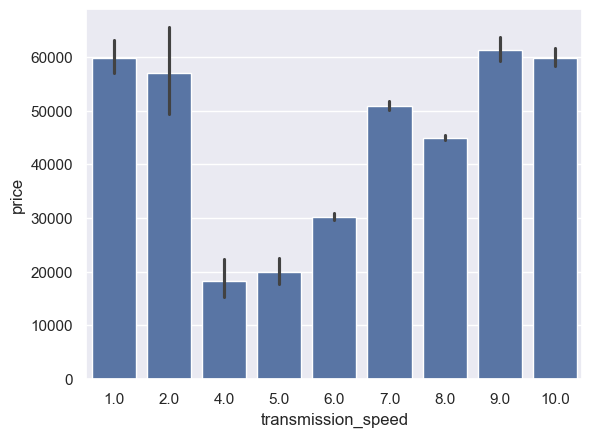

In [248]:
sns.barplot(data=train_df, x='transmission_speed', y='price', estimator=np.mean)

## 4. EDA

In [249]:
train_df['accident'] = train_df['accident'].astype("int")

In [250]:
train_df['milage_age'] = train_df['milage'] * train_df['car_age']
train_df['milage_age_ratio'] = train_df['milage'] / train_df['car_age']
train_df['mean_milage_with_age'] = train_df.groupby(['car_age'])['milage'].transform('mean')
train_df['mean_milage_age_ratio_with_age'] = train_df.groupby(['car_age'])['milage_age_ratio'].transform('mean')

In [251]:
corr_matrix = train_df.select_dtypes(exclude="object").corr()
corr_matrix['price'].sort_values(ascending=False)

price                             1.000000
horse_power                       0.214364
mean_milage_age_ratio_with_age    0.148894
engine_size                       0.094445
cylinder                          0.087329
transmission_speed                0.077056
yearly_mileage                   -0.096186
milage_age_ratio                 -0.096186
accident                         -0.125122
car_age                          -0.231777
milage_age                       -0.238958
mean_milage_with_age             -0.261521
milage                           -0.283067
Name: price, dtype: float64